<a href="https://colab.research.google.com/github/Shirleyhanx1/Customer-Churn-Porject---Python/blob/main/Facebook_Ads_Campaigns_Performance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')


In [ ]:
from google.colab import files
uploaded = files.upload()

import io
df = pd.read_csv(io.BytesIO(uploaded['KAG_conversion_data.csv']))

Saving KAG_conversion_data.csv to KAG_conversion_data.csv


In [ ]:
df.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0
3,708815,916,103928,30-34,M,28,4259,1,1.25,1,0
4,708818,916,103928,30-34,M,28,4133,1,1.29,1,1


In [ ]:
df["xyz_campaign_id"].unique()

array([ 916,  936, 1178])

In [ ]:
df["xyz_campaign_id"].replace({916:"campaign_a",936:"campaign_b",1178:"campaign_c"}, inplace=True)

In [ ]:
def campaign_metrics(df,groups):
  df_metrics=df[groups + ['Approved_Conversion','Impressions','Clicks','Spent']].groupby(groups).sum()
  df_metrics['Conversion_Rate'] = df_metrics['Approved_Conversion'] / df_metrics['Impressions']*100
  df_metrics['CTR'] = df_metrics['Clicks']/ df_metrics['Impressions']*100
  df_metrics['CAC'] = df_metrics['Spent']/ df_metrics['Approved_Conversion']
  return df_metrics


In [ ]:
#metrics by xyz_campaign_id group
campaign_metrics(df,['xyz_campaign_id'])

,Approved_Conversion,Impressions,Clicks,Spent,Conversion_Rate,CTR,CAC
xyz_campaign_id,,,,,,,
campaign_a,24,482925,113,149.710001,0.004970,0.023399,6.237917
campaign_b,183,8128187,1984,2893.369999,0.002251,0.024409,15.810765
campaign_c,872,204823716,36068,55662.149959,0.000426,0.017609,63.832741


In [ ]:
#metrics by fb_campaign_id group
campaign_metrics(df,['xyz_campaign_id','gender'])

Approved_Conversion  Impressions  Clicks  \
xyz_campaign_id gender                                             
campaign_a      F                         8       197081      52   
                M                        16       285844      61   
campaign_b      F                        96      6290206    1633   
                M                        87      1837981     351   
campaign_c      F                       391    108375560   22193   
                M                       481     96448156   13875   

                               Spent  Conversion_Rate       CTR        CAC  
xyz_campaign_id gender                                                      
campaign_a      F          69.850000         0.004059  0.026385   8.731250  
                M          79.860001         0.005597  0.021340   4.991250  
campaign_b      F        2380.359999         0.001526  0.025961  24.795417  
                M         513.010000         0.004733  0.019097   5.896667  
campaign_c      F       32052.409965         0.000361  0.020478  81.975473  
                M       23609.739994         0.000499  0.014386  49.084699

In [ ]:
campaign_metrics(df,['age','gender'])

Approved_Conversion  Impressions  Clicks         Spent  \
age   gender                                                           
30-34 F                       195     31571576    5099   7611.479995   
      M                       299     36421443    4384   7640.919991   
35-39 F                        95     21439505    4161   6061.349992   
      M                       112     20665139    2933   5051.080003   
40-44 F                        93     23396175    5177   7396.579984   
      M                        77     16208132    2559   4193.149997   
45-49 F                       112     38455591    9441  13433.209993   
      M                        96     25277267    4411   7317.460004   

              Conversion_Rate       CTR         CAC  
age   gender                                         
30-34 F              0.000618  0.016151   39.033231  
      M              0.000821  0.012037   25.554916  
35-39 F              0.000443  0.019408   63.803684  
      M              0.000542  0.014193   45.098929  
40-44 F              0.000398  0.022128   79.533118  
      M              0.000475  0.015788   54.456493  
45-49 F              0.000291  0.024550  119.939375  
      M              0.000380  0.017450   76.223542

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.isnull().sum()

ad_id                    0
xyz_campaign_id          0
fb_campaign_id           0
age                      0
gender                   0
interest                 0
Impressions              0
Clicks                   0
Spent                    0
Total_Conversion         0
Approved_Conversion      0
Conversion_Rate          0
CTR                      0
CAC                    136
dtype: int64

In [ ]:
df['CAC'].fillna(83.4, inplace=True)

In [ ]:
df.isnull().sum()

ad_id                  0
xyz_campaign_id        0
fb_campaign_id         0
age                    0
gender                 0
interest               0
Impressions            0
Clicks                 0
Spent                  0
Total_Conversion       0
Approved_Conversion    0
Conversion_Rate        0
CTR                    0
CAC                    0
dtype: int64

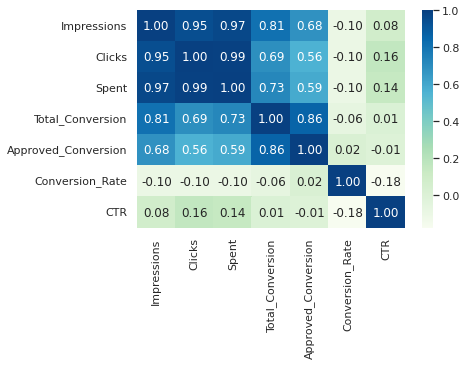

In [ ]:
g=sns.heatmap(df[["Impressions","Clicks","Spent","Total_Conversion","Approved_Conversion",'Conversion_Rate','CTR']].corr(),annot=True ,fmt=".2f", cmap="GnBu")

In [ ]:
d= pd.DataFrame(df['gender'].value_counts())
fig = px.pie(d,values='gender',names=['Male','Female'],hole=0.4,opacity=0.7,
            color_discrete_sequence=['orange','steelblue'])

fig.add_annotation(text='Gender',
                   x=0.5,y=0.5,showarrow=False,font_size=20,opacity=0.7,font_family='monospace')

fig.update_layout(
    font_family='monospace',
    legend=dict(x=0.37,y=-0.05,orientation='h',traceorder='reversed'),
    hoverlabel=dict(bgcolor='white'))

fig.update_traces(textposition='outside', textinfo='percent')

fig.show()

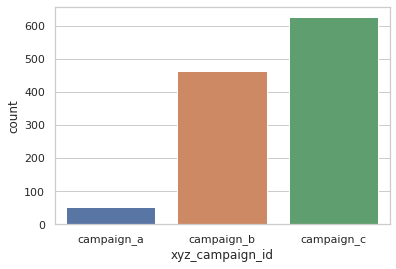

In [ ]:
# count plot on single categorical variable 
sns.countplot(x ='xyz_campaign_id', data = df) 
# Show the plot 
plt.show() 

In [ ]:
d= pd.DataFrame(df['xyz_campaign_id'].value_counts())
fig = px.pie(d,values='xyz_campaign_id',names=['campaign_c','campaign_b','campaign_a'],hole=0.4,opacity=0.7,
            color_discrete_sequence=['orange','steelblue','darkblue'])

fig.add_annotation(text='Campaign',
                   x=0.5,y=0.5,showarrow=False,font_size=20,opacity=0.7,font_family='monospace')

fig.update_layout(
    font_family='monospace',
    legend=dict(x=0.37,y=-0.05,orientation='h',traceorder='reversed'),
    hoverlabel=dict(bgcolor='white'))

fig.update_traces(textposition='outside', textinfo='percent')

fig.show()

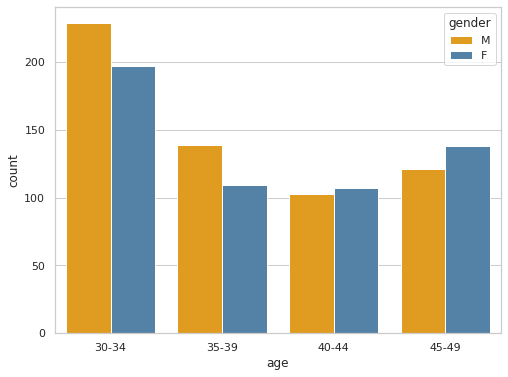

In [ ]:
# count plot on single categorical variable 
#fig=plt.figure(figsize=(8,6))
#sns.countplot(x ='age', hue='gender', data = df,  palette=['orange', 'steelblue']) 
#plt.show() 

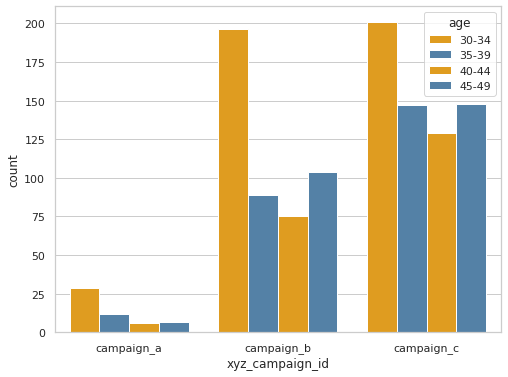

In [ ]:
#fig=plt.figure(figsize=(8,6))
#tips = sns.load_dataset("tips")
#sns.barplot(x=df["xyz_campaign_id"], y=df["Approved_Conversion"], hue=df["age"], data=tips)


fig=plt.figure(figsize=(8,6))
sns.countplot(x ='xyz_campaign_id', hue='age', data = df,  palette=['orange', 'steelblue']) 
plt.show() 

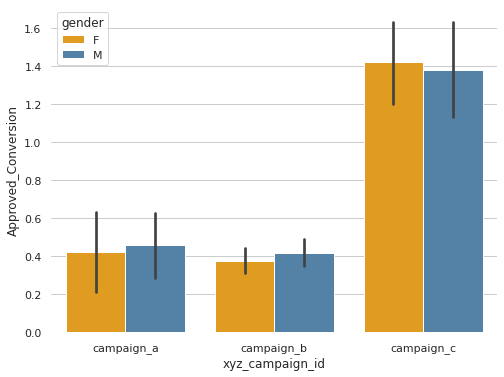

In [ ]:
fig=plt.figure(figsize=(8,6))
tips = sns.load_dataset("tips")
sns.barplot(x=df["xyz_campaign_id"], y=df["Approved_Conversion"], hue=df["gender"], data=tips, palette=['orange','steelblue'])

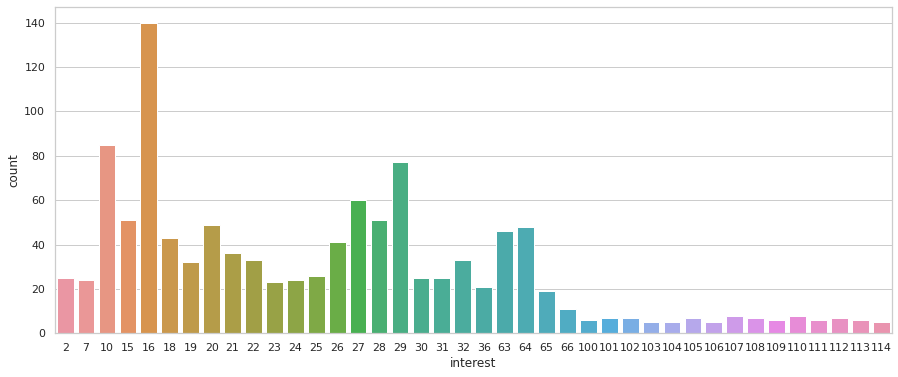

In [ ]:
# count plot on single categorical variable 
fig_dims = (15,6)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(x ='interest', data = df)  
plt.show() 

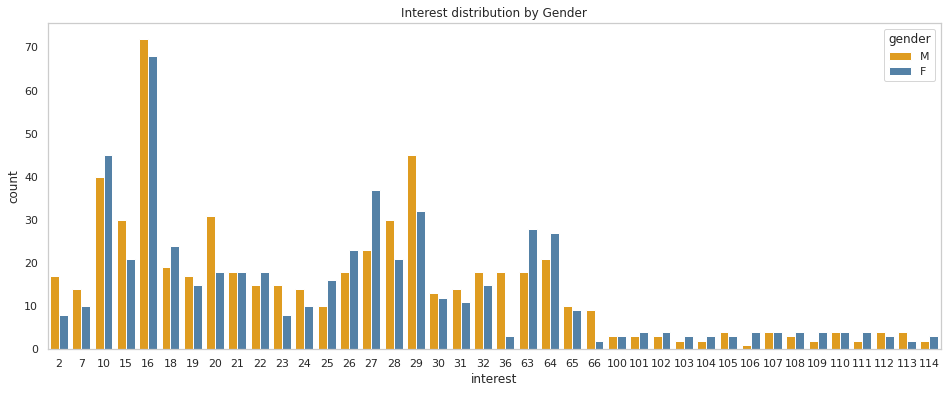

In [ ]:
fig=plt.figure(figsize=(16,6))

sns.countplot(data=df, x='interest', hue='gender', palette=['orange','steelblue'])
plt.title('Interest distribution by Gender')
plt.grid(axis='y')

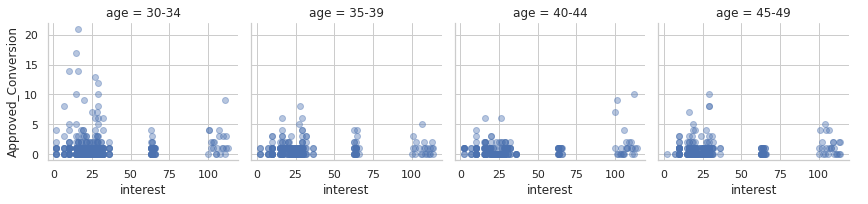

In [ ]:
g = sns.FacetGrid(df, col="age")
g.map(plt.scatter, "interest", "Approved_Conversion", alpha=.4)
g.add_legend();

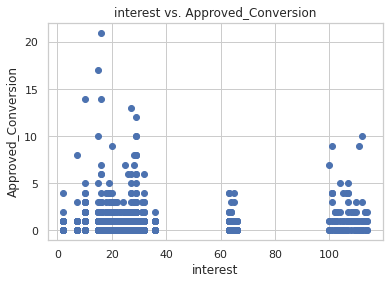

In [ ]:
plt.scatter(df["interest"], df["Approved_Conversion"])
plt.title("interest vs. Approved_Conversion")
plt.xlabel("interest")
plt.ylabel("Approved_Conversion")
plt.show()

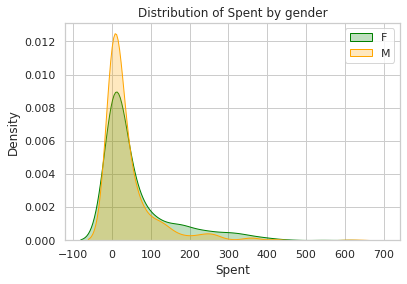

In [ ]:

ax = sns.kdeplot(df.Spent[(df["gender"] == 'F') ],
                color="green", shade = True)
ax = sns.kdeplot(df.Spent[(df["gender"] == 'M') ],
                ax =ax, color="orange", shade= True)
ax.legend(["F","M"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Spent')
ax.set_title('Distribution of Spent by gender');

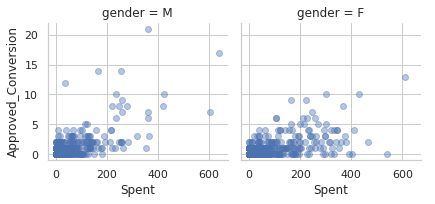

In [ ]:
g = sns.FacetGrid(df, col="gender")
g.map(plt.scatter, "Spent", "Approved_Conversion", alpha=.4)
g.add_legend();

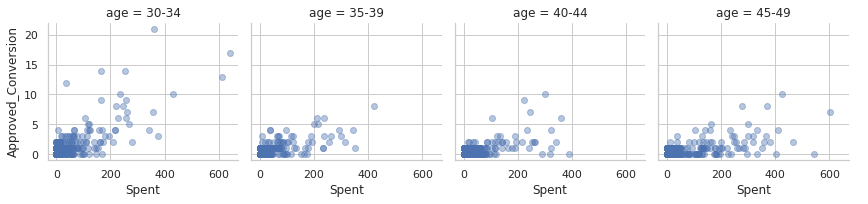

In [ ]:
g = sns.FacetGrid(df, col="age")
g.map(plt.scatter, "Spent", "Approved_Conversion", alpha=.4)
g.add_legend();

Text(0.5, 1.0, 'Distribution of Interest by gender')

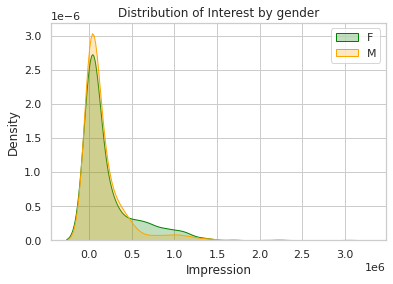

In [ ]:

ax = sns.kdeplot(df.Impressions[(df["gender"] == 'F') ],
                color="green", shade = True)
ax = sns.kdeplot(df.Impressions[(df["gender"] == 'M') ],
                ax =ax, color="orange", shade= True)
ax.legend(["F","M"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Impression')
ax.set_title('Distribution of Interest by gender')

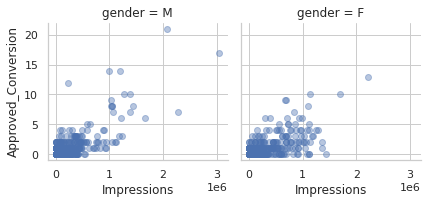

In [ ]:
g = sns.FacetGrid(df, col="gender")
g.map(plt.scatter, "Impressions", "Approved_Conversion", alpha=.4)
g.add_legend();

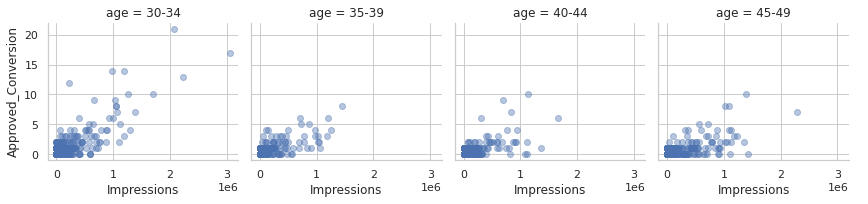

In [ ]:
g = sns.FacetGrid(df, col="age")
g.map(plt.scatter, "Impressions", "Approved_Conversion", alpha=.4)
g.add_legend();

Text(0.5, 1.0, 'Distribution of Interest by gender')

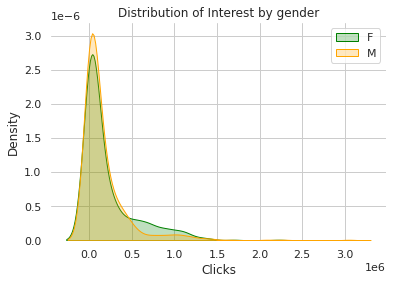

In [ ]:
ax = sns.kdeplot(df.Impressions[(df["gender"] == 'F') ],
                color="green", shade = True)
ax = sns.kdeplot(df.Impressions[(df["gender"] == 'M') ],
                ax =ax, color="orange", shade= True)
ax.legend(["F","M"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Clicks')
ax.set_title('Distribution of Interest by gender')

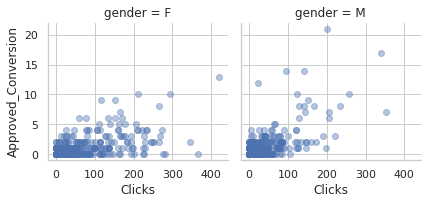

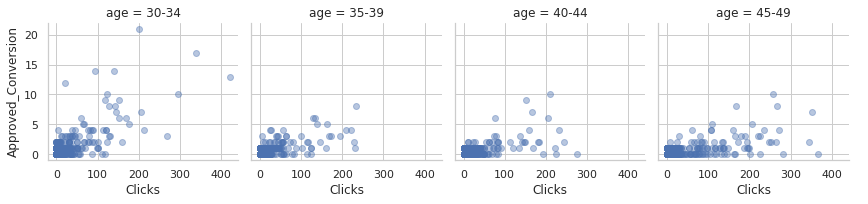

In [ ]:
g = sns.FacetGrid(df, col="gender")
g.map(plt.scatter, "Clicks", "Approved_Conversion", alpha=.4)
g.add_legend()

g = sns.FacetGrid(df, col="age")
g.map(plt.scatter, "Clicks", "Approved_Conversion", alpha=.4)
g.add_legend();

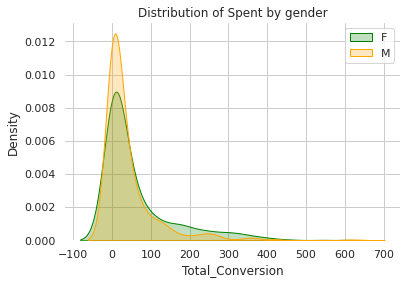

In [ ]:

ax = sns.kdeplot(df.Spent[(df["gender"] == 'F') ],
                color="green", shade = True)
ax = sns.kdeplot(df.Spent[(df["gender"] == 'M') ],
                ax =ax, color="orange", shade= True)
ax.legend(["F","M"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Total_Conversion')
ax.set_title('Distribution of Spent by gender');

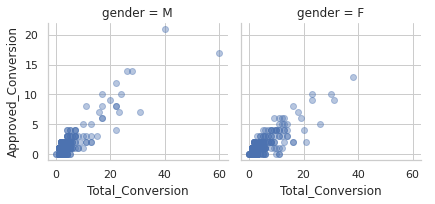

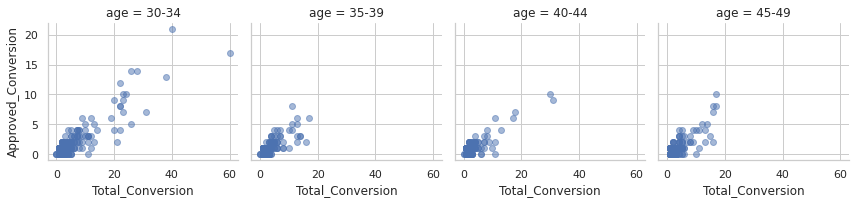

In [ ]:
g = sns.FacetGrid(df, col="gender")
g.map(plt.scatter, "Total_Conversion", "Approved_Conversion", alpha=.4)
g.add_legend()

g = sns.FacetGrid(df, col="age")
g.map(plt.scatter, "Total_Conversion", "Approved_Conversion",alpha=.5)
g.add_legend()

In [ ]:
categories = ['ad_id', 'fb_campaign_id','age', 'gender', 'xyz_campaign_id', 'interest']
df[categories] = df[categories].astype('category')

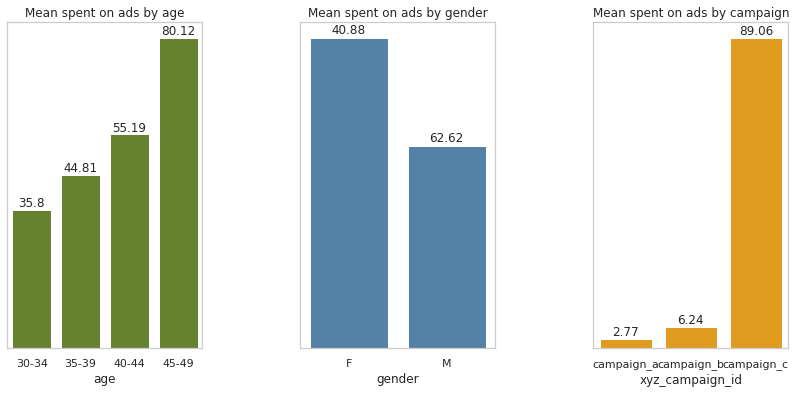

In [ ]:
avg_spending_age = df.groupby('age')['Spent'].mean().sort_values().reset_index()
avg_spending_gender = df.groupby('gender')['Spent'].mean().sort_values().reset_index()
avg_spengind_xyz = df.groupby('xyz_campaign_id')['Spent'].mean().sort_values().reset_index()

fig, axes = plt.subplots(1,3, figsize=[14,6], constrained_layout=True)
plt.subplots_adjust(wspace = 0.5, hspace=0.8)

# First plot
ax = sns.barplot(ax = axes[0], data=avg_spending_age, x='age', y='Spent', color = 'olivedrab')
ax.set_title('Mean spent on ads by age')
ax.set_yticks([])
ax.set_ylabel('')
i = 0
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2., height + 1,
        round(avg_spending_age['Spent'][i], 2),ha="center")
    i += 1

# Second plot
ax1 = sns.barplot(ax = axes[1], data=avg_spending_gender, x='gender', y='Spent', color = 'steelblue')
ax1.set_title('Mean spent on ads by gender')
ax1.set_yticks([])
ax1.set_ylabel('')
i = 0
for p in ax1.patches:
    height = p.get_height()
    ax1.text(p.get_x()+p.get_width()/2., height + 1,
        round(avg_spending_gender['Spent'][i], 2),ha="center")
    i += 1

# Third plot
ax2 = sns.barplot(ax = axes[2], data=avg_spengind_xyz, x='xyz_campaign_id', y='Spent', color = 'orange')
ax2.set_title('Mean spent on ads by campaign')
ax2.set_yticks([])
ax2.set_ylabel('')
i = 0
for p in ax2.patches:
    height = p.get_height()
    ax2.text(p.get_x()+p.get_width()/2., height + 1,
        round(avg_spengind_xyz['Spent'][i], 2),ha="center")
    i += 1

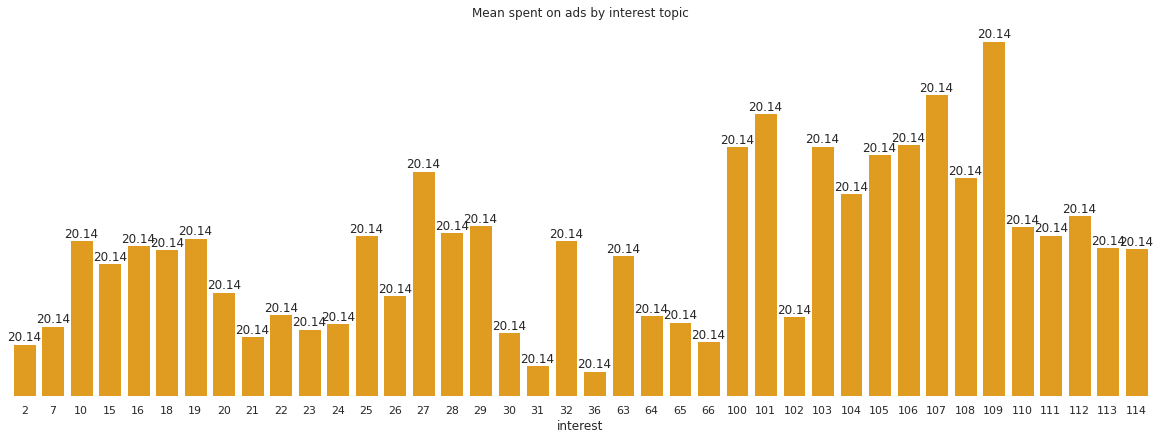

In [ ]:
# Hide spines (black border of the plot)
plt.rcParams['axes.spines.left'] = False
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.bottom'] = False

avg_spending_topic = df.groupby('interest')['Spent'].mean().reset_index()

fig, axes = plt.subplots(1,1, figsize=[16,6], constrained_layout=True)

# First plot
ax = sns.barplot(ax = axes, data=avg_spending_topic, x='interest', y='Spent', color = 'orange')
ax.set_title('Mean spent on ads by interest topic')
ax.set_yticks([])
i = 0
ax.set_ylabel('')
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2., height + 1,
        round(avg_spending_topic['Spent'][i], 2),ha="center")


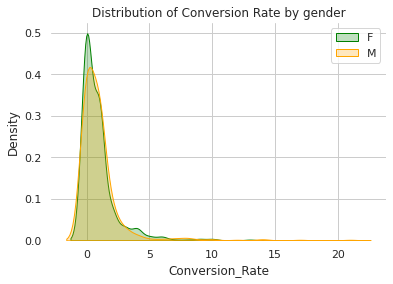

In [ ]:
ax = sns.kdeplot(df.Approved_Conversion[(df["gender"] == 'F') ],
                color="green", shade = True)
ax = sns.kdeplot(df.Approved_Conversion[(df["gender"] == 'M') ],
                ax =ax, color="orange", shade= True)
ax.legend(["F","M"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Conversion_Rate')
ax.set_title('Distribution of Conversion Rate by gender');

In [ ]:
df3 = df.groupby('xyz_campaign_id')[['Conversion_Rate','CTR']].sum()
df3.sort_values(by='Conversion_Rate', ascending = False)

,Conversion_Rate,CTR,CAC
xyz_campaign_id,,,
campaign_b,10.558345,7.656697,NaN
campaign_a,0.739151,0.972795,NaN
campaign_c,0.402561,10.138193,NaN


In [ ]:
df4 = df.groupby('xyz_campaign_id')[['Spent','Approved_Conversion']].sum()
df4['CAC'] = df4['Spent']/ df4['Approved_Conversion']
df4.sort_values(by='CAC', ascending = True)

,Spent,Approved_Conversion,CAC
xyz_campaign_id,,,
campaign_a,149.710001,24,6.237917
campaign_b,2893.369999,183,15.810765
campaign_c,55662.149959,872,63.832741


In [ ]:

df5 = df.groupby('fb_campaign_id')[['Impressions', 'Spent','Clicks']].sum()
data = pd.DataFrame(df5)
data

,Impressions,Spent,Clicks
fb_campaign_id,,,
103916,7350,1.430000,1
103917,17861,1.820000,2
103920,693,0.000000,0
103928,8392,2.540000,2
103929,1915,0.000000,0
...,...,...,...
179977,1129773,358.189997,252
179978,637549,173.880003,120
179979,151531,40.289999,28


In [ ]:
X = df5.values

In [ ]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(X)
scaled_features

array([[-0.54421246, -0.53751754, -0.52820627],
       [-0.49697268, -0.53131265, -0.50480229],
       [-0.57413114, -0.56026878, -0.55161025],
       ...,
       [ 0.10378284,  0.08074336,  0.1037012 ],
       [ 2.97440278,  2.60119867,  2.60792708],
       [ 1.72906315,  2.07457908,  2.1164435 ]])

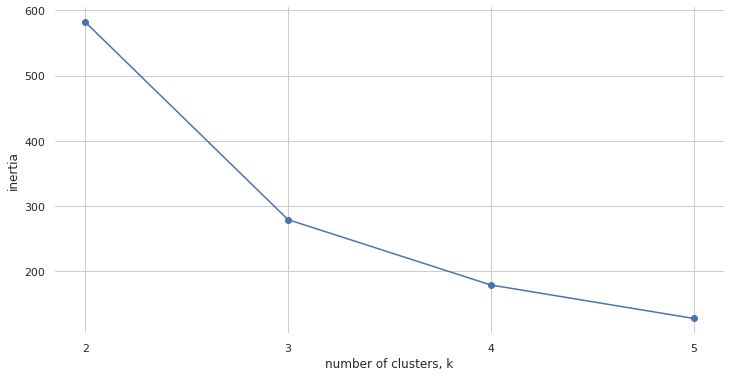

In [ ]:
ks = range(2, 6)
inertias = []

for k in ks:
    model = KMeans(n_clusters= k)
    clusters =  model.fit(scaled_features)
    inertias.append(model.inertia_)
    
# Plot ks vs inertias
plt.figure(figsize=(12,6))
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

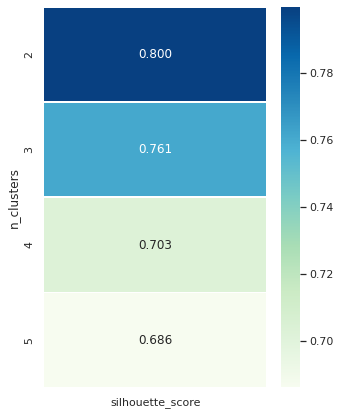

In [ ]:

ks = range(2,6)
results = []

for k in ks:
    model = KMeans(n_clusters= k)
    cluster_l = model.fit_predict(scaled_features)
    silh_avg = silhouette_score(scaled_features, cluster_l)
    results.append([k, silh_avg])

result = pd.DataFrame(results, columns = ['n_clusters', 'silhouette_score'])
pivot_km = pd.pivot_table(result, index='n_clusters', values='silhouette_score')

plt.figure(figsize=(5,7))
sns.heatmap(pivot_km, annot=True, linewidths=.5, fmt='.3f', cmap = 'GnBu')

In [ ]:
MODEL = KMeans(n_clusters=3)
MODEL.fit(scaled_features)

KMeans(n_clusters=3)

In [ ]:
data['Cluster'] = MODEL.predict(scaled_features)
data.head()

,Impressions,Spent,Clicks,Cluster
fb_campaign_id,,,,
103916,7350.0,1.43,1.0,1
103917,17861.0,1.82,2.0,1
103920,693.0,0.00,0.0,1
103928,4196.0,1.27,1.0,1
103929,1915.0,0.00,0.0,1


In [ ]:

px.scatter_3d(data_frame=data, x='Impressions', y='Clicks', z='Spent', color='Cluster', color_continuous_scale= ['steelblue','orange', 'olivedrab'])
           